In [1]:
import os,sys
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from meta_utils import *

antigen_df = pd.read_csv('chip_atlas_antigen_list.csv')
celltype_df = pd.read_csv('chip_atlas_celltype_list.csv')
file_df = pd.read_csv('chip_atlas_file_list.csv')
exp_df = pd.read_csv('chip_atlas_experiment_list.csv')

### Define Plotting Parameters

In [2]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6','#c2c2f0','ivory']
gen_dict = {'hg19': 'H. sapiens', 'mm9': 'M. musculus', 'sacCer3': 'S. cerevisiae', 'dm3':'D. melanogaster','ce10': 'C. elegans', 'rn6':'R. norvegicus'}


### Specify Target Chromsome, Cell Class, and Cell Type

In [3]:
target = 'hg19'
cell_class = 'Blood'
cell_type = 'Lymphoblastoid cell line'

# Count Series
gen_counts = pd.Series.value_counts(antigen_df['Genome assembly']).rename(gen_dict)
antigen_counts = antigen_df.groupby(['Genome assembly','Antigen class']).sum().rename(gen_dict).unstack().rename_axis(None)

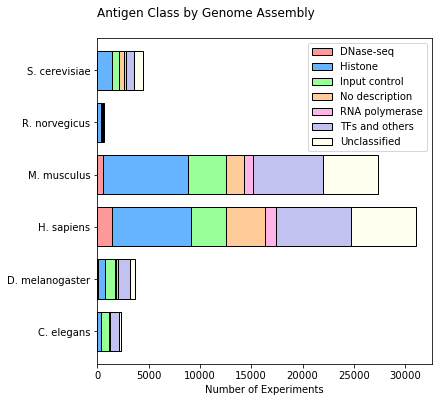

In [4]:
# Plot Antigen Class Breakdown
antigen_counts['Number of experiments'].plot(kind='barh', color=colors, 
                                             align='center',figsize=(6,6),stacked=True,width=0.75, edgecolor='k')
plt.title('Antigen Class by Genome Assembly\n',loc='left')
plt.axes().legend(loc='upper right')
plt.xlabel('Number of Experiments')
plt.show()


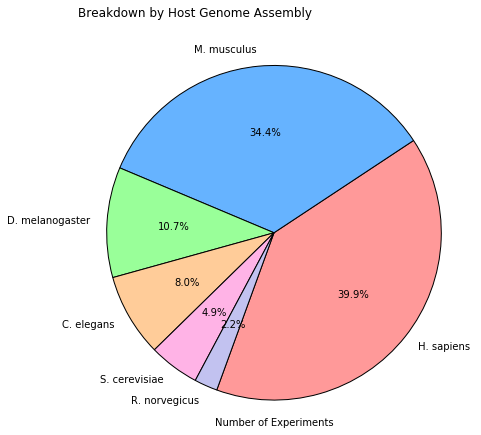

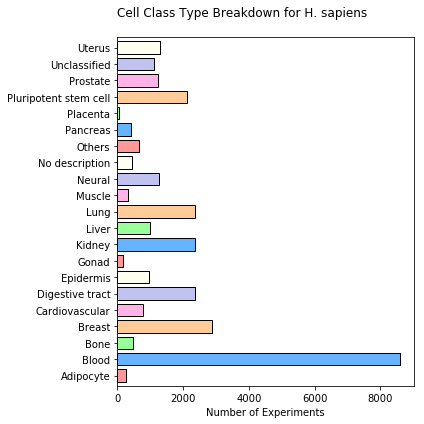

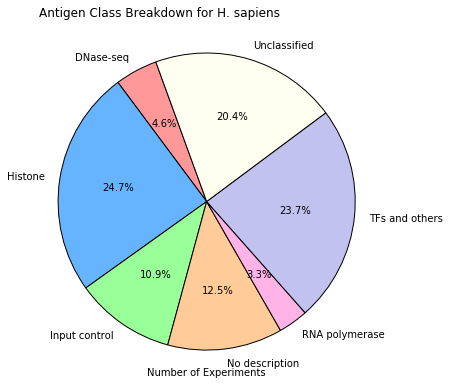

In [7]:
# Plot Host Genome Assembly Breakdown
plt.figure(1)
gen_counts.plot(kind='pie', colors = colors, autopct='%1.1f%%',
                startangle=250, wedgeprops={'linewidth':1, 'edgecolor':'black'}, figsize=(6,6))
plt.axis('equal')
plt.title('Breakdown by Host Genome Assembly\n\n',loc='left')
plt.tight_layout()
plt.xlabel('Number of Experiments')
plt.ylabel('')
plt.show()

# Cell Class Type Breakdown
celltype_df[celltype_df['Genome assembly'] == target].groupby('Cell type class').sum().rename_axis(None).plot(kind='barh', 
              color=colors, align='center',figsize=(6,6),stacked=True, width=0.75, edgecolor='k')
plt.title('Cell Class Type Breakdown for '+gen_dict[target]+'\n',loc='left')
plt.xlabel('Number of Experiments')
plt.ylabel('')
plt.legend().set_visible(False)
plt.tight_layout()
plt.savefig('cell_class.png', dpi=3000)
plt.show()

# Blood Cell Type Breakdown
blood_df = celltype_df[celltype_df['Cell type class'] == 'Blood']
blood_count = blood_df[blood_df['Genome assembly'] == target].groupby('Cell type').sum().rename_axis(None)

# Antigen Breakdown
antigen_counts.loc[gen_dict[target]]['Number of experiments'].plot(kind='pie', colors = colors, autopct='%1.1f%%',
                startangle=110, wedgeprops={'linewidth':1, 'edgecolor':'black'}, figsize=(6,6))
plt.axis('equal')
plt.title('Antigen Class Breakdown for '+gen_dict[target]+'\n',loc='left')
plt.xlabel('Number of Experiments')
plt.ylabel('')
plt.show()

In [9]:
blood_count = blood_count.sort_values(by='Number of experiments')
blood_count.to_csv('blood_cell_tsypes.csv', sep=' '
blood_count.sort_values(by='Number of experiments') / blood_count.sum(axis=0) * 100

SyntaxError: invalid syntax (<ipython-input-9-8e90c02caf2d>, line 3)

In [ ]:
ctype_df = celltype_df[(celltype_df['Genome assembly'] == target) & (celltype_df['Cell type class'] == cell_class) & (celltype_df['Cell type'] == cell_type)].drop(['Genome assembly','Cell type class','Cell type'],axis=1)
target_experiments = pd.Series.tolist(ctype_df['Experimental IDs included'])[0].split(',')

print(int(ctype_df['Number of experiments'])," experiments found for: \n",gen_dict[target],' --> ',cell_class,' --> ',cell_type)